In [5]:
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))
from visualization.utils import defaultColors
from helpers import load_from_path, save_image

In [6]:
# from mobo.surrogate_model import BoTorchSurrogateModelReapeat, BoTorchSurrogateModel
import pandas as pd
from pathlib import Path
import numpy as np
import yaml

In [7]:
# qnehvi, raqnehvi, mars
# path_list = list(Path("../good results/peaks/risk-averse1/mars/").glob("*"))
# path_list = list(Path("../good results/peaks/risk-averse1/raqnehvi/").glob("*"))
path_list = list(Path("../good results/peaks/risk-averse1/qnehvi/").glob("*"))

path = path_list[0]

res_dict = load_from_path(path)
eval_sample = res_dict["eval_samples"]
batch_size = res_dict["batch_size"]
init_samples = res_dict["init_samples"]

index = eval_sample.index + 1
#load all evaluated samples from path_list and create one big dataframe with columnnames appended with ___i
eval_samples = pd.concat([load_from_path(path)["eval_samples"] for path in path_list], keys=range(len(path_list)), names=["seed"])
eval_samples = eval_samples.reset_index()

#check if all same length
if len(eval_samples.groupby("seed").size().unique()) != 1:
    raise ValueError("Not all seeds have the same number of iterations")

eval_samples_mean = eval_samples.groupby("iterID").transform("mean").iloc[eval_sample.index]
eval_samples_std = eval_samples.groupby("iterID").transform("std").iloc[eval_sample.index]
hv_mean = eval_samples_mean["Hypervolume_indicator"]
hv_std = eval_samples_std["Hypervolume_indicator"]

mvar_hv_mean = eval_samples_mean["MVaR_Hypervolume_indicator"]
mvar_hv_std = eval_samples_std["MVaR_Hypervolume_indicator"]

hv_mean


0     0.305691
1     0.305691
2     0.305691
3     0.305691
4     0.305691
5     0.305691
6     0.306679
7     0.310154
8     0.321443
9     0.340057
10    0.342410
11    0.345905
12    0.346071
13    0.347252
14    0.353451
15    0.355613
16    0.359615
17    0.359707
18    0.362719
19    0.363999
20    0.385130
21    0.385265
22    0.386749
23    0.387852
24    0.432915
25    0.434000
26    0.438810
27    0.457080
28    0.458398
29    0.459598
30    0.462139
31    0.463299
32    0.464154
33    0.472065
34    0.472208
35    0.481830
Name: Hypervolume_indicator, dtype: float64

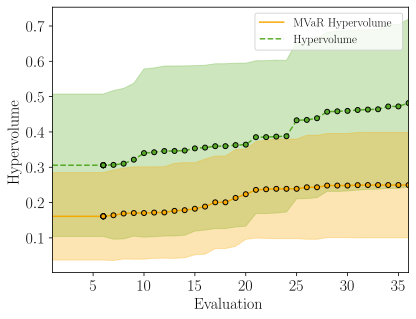

In [8]:
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"],
    # font size
    "font.size": 16,
})

colors = defaultColors

batch_dots = eval_sample["iterID"]*batch_size +init_samples

fig, ax = plt.figure(), plt.gca()
#dashed line and marker
ax.plot(index, mvar_hv_mean, label="MVaR Hypervolume", color=colors[0], linestyle="-")
ax.plot(batch_dots, mvar_hv_mean, color=colors[0], marker="o", linestyle="None", markersize=5, 
        markeredgecolor="black")
           
ax.plot(index, hv_mean, label="Hypervolume", linestyle="--", color=colors[1])
ax.plot(batch_dots, hv_mean, color=colors[1], marker="o", linestyle="None", markersize=5,
        markeredgecolor="black")

ax.fill_between(index, hv_mean - hv_std, hv_mean + hv_std, color=colors[1], alpha=0.3)
ax.fill_between(index, mvar_hv_mean - mvar_hv_std, mvar_hv_mean + mvar_hv_std, color=colors[0], alpha=0.3)

ax.set_xlabel("Evaluation")
ax.set_ylabel("Hypervolume")
# ax.set_title("Hypervolume and MVaR Hypervolume")
ax.set_xlim(1, index.max())
ax.legend(fontsize=12)

save_image(fig, path, "hv")
